# 1) install, import, load general

In [ ]:
!nvcc --version         # verify CUDA for GPU usage

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
# genral
import torch
import tensorflow as tf
import time
import random
import numpy as np
import pandas as pd
from collections import Counter
# progress bar
import progressbar
# cmd
import os
from os import getcwd
import pathlib
# plot and image
from matplotlib import pyplot
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage.io import imread, imshow

In [ ]:
# time function to measure procces duration
start_time=time.time()
print("duration in minuites=", (time.time()-start_time)/60 )

duration in minuites= 1.5576680501302083e-06


# Lightglue install

## clone the lightglue repo from git

In [ ]:
os.chdir("/content") # go back to the main working directory
from pathlib import Path

if Path.cwd().name != "LightGlue":
    !git clone --quiet https://github.com/cvg/LightGlue/
    %cd LightGlue
    !pip install --progress-bar off --quiet -e .

# import lightglue libraries
from lightglue import LightGlue, SuperPoint, DISK
from lightglue.utils import load_image, rbd
from lightglue import viz2d
# import torch

torch.set_grad_enabled(False)
images = Path("assets")

/content/LightGlue
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for lightglue (pyproject.toml) ... done


## Load lightglue model: extractor and matcher

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 'mps', 'cpu'
# extracot & matcher
extractor = SuperPoint(max_num_keypoints=2048).eval().cuda()  # load the extractor
matcher = LightGlue(features='superpoint').eval().cuda()      # load the matcher

# note that a gpu might be required!

Downloading: "https://github.com/cvg/LightGlue/releases/download/v0.1_arxiv/superpoint_v1.pth" to /root/.cache/torch/hub/checkpoints/superpoint_v1.pth
100%|██████████| 4.96M/4.96M [00:00<00:00, 65.6MB/s]
Downloading: "https://github.com/cvg/LightGlue/releases/download/v0.1_arxiv/superpoint_lightglue.pth" to /root/.cache/torch/hub/checkpoints/superpoint_lightglue_v0-1_arxiv.pth
100%|██████████| 45.3M/45.3M [00:00<00:00, 204MB/s]


# 2) Lightglue Demo and variables

In [ ]:
# input is full path
image_a_path="/content/jimny.jpg"
image_b_path="/content/jimny2.jpg"

In [ ]:
# Lightglue outputs are:
#   extractor:
#     feats0, feats1
#   matcher:
#     matches01
#     kpts0, kpts1
#
#   number of model layers until stop
#     matches01["stop"]

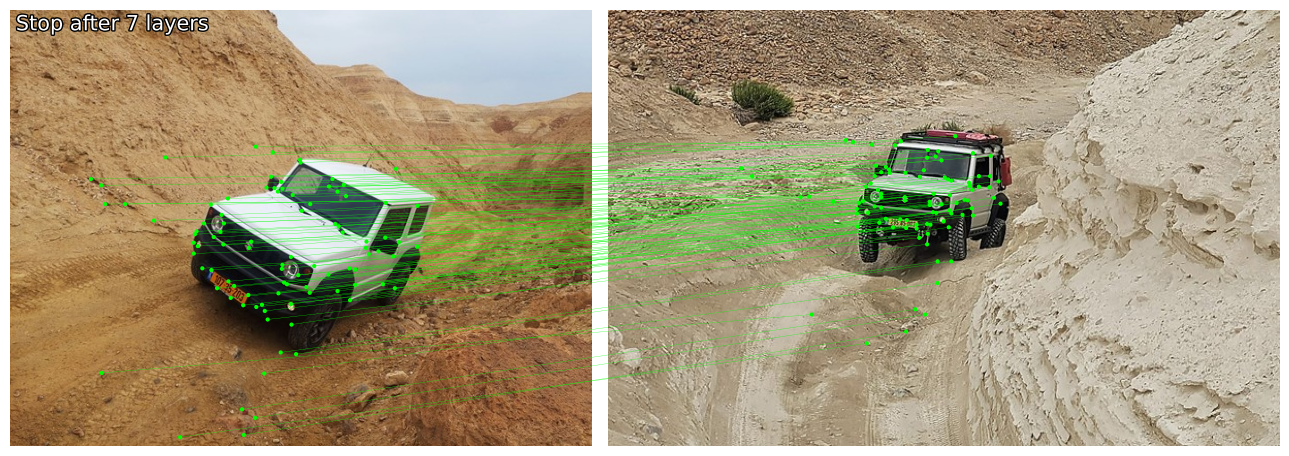

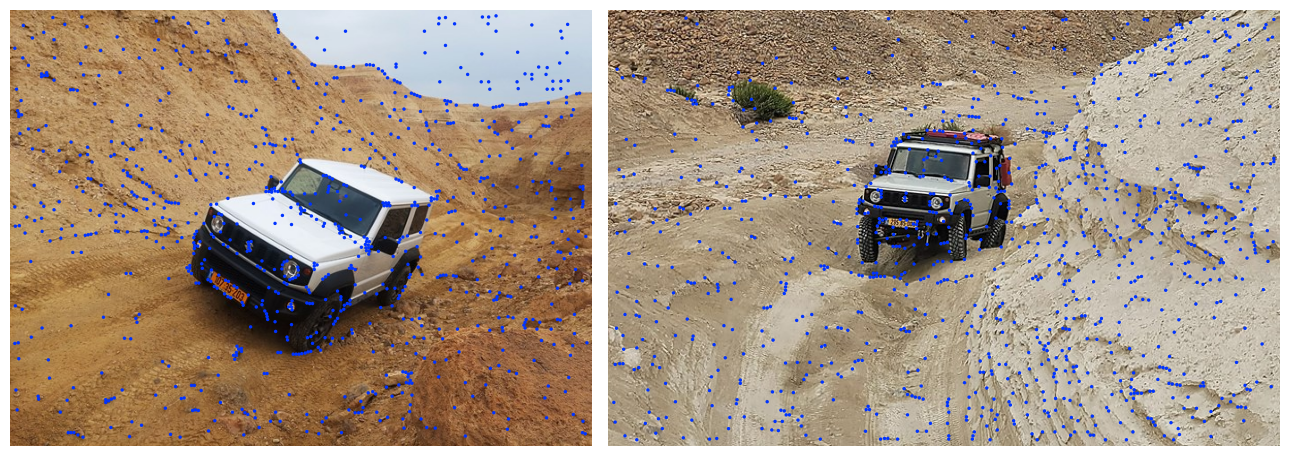

In [ ]:
image0 = load_image(images / image_a_path)
image1 = load_image(images / image_b_path)

feats0 = extractor.extract(image0.to(device))
feats1 = extractor.extract(image1.to(device))
matches01 = matcher({"image0": feats0, "image1": feats1})
feats0, feats1, matches01 = [
    rbd(x) for x in [feats0, feats1, matches01]
]  # remove batch dimension

kpts0, kpts1, matches = feats0["keypoints"], feats1["keypoints"], matches01["matches"]
m_kpts0, m_kpts1 = kpts0[matches[..., 0]], kpts1[matches[..., 1]]

axes = viz2d.plot_images([image0, image1])
viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
viz2d.add_text(0, f'Stop after {matches01["stop"]} layers')

kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
viz2d.plot_images([image0, image1])
viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=6)

In [ ]:
# image0 = load_image(images / "/content/apple.png")
# image1 = load_image(images / "/content/apple-tree.png")

# feats0 = extractor.extract(image0.to(device))
# feats1 = extractor.extract(image1.to(device))
# matches01 = matcher({"image0": feats0, "image1": feats1})
# feats0, feats1, matches01 = [
#     rbd(x) for x in [feats0, feats1, matches01]
# ]  # remove batch dimension

# kpts0, kpts1, matches = feats0["keypoints"], feats1["keypoints"], matches01["matches"]
# m_kpts0, m_kpts1 = kpts0[matches[..., 0]], kpts1[matches[..., 1]]

# axes = viz2d.plot_images([image0, image1])
# viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
# viz2d.add_text(0, f'Stop after {matches01["stop"]} layers')

# kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
# viz2d.plot_images([image0, image1])
# viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=6)

In [ ]:
# number of model layers until stop
# matches01["stop"]

In [ ]:
# number of keypoints in image0 - Left
# len(kpts0)
# number of keypoints in image1 - Right
# len(kpts1)

In [ ]:
# number of keypoints matched  in image0 - Left
# len(m_kpts0)
# number of keypoints matched in image1 - Right
# len(m_kpts1)
# m_kpts0 = m_kpts1 becaues they match!

## Lightglue sub-function

In [ ]:
# plot matches green lines
# print("matches")
# axes = viz2d.plot_images([image0, image1])
# viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)

In [ ]:
# plot keypoints
# print("keypoints")
# viz2d.plot_images([image0, image1])
# viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=6)

## define a function that calls lightglue and outputs images with extractor and matcher


In [ ]:
# #define a function that takes 2 image path and apply light glue

# def lightglue_prediction_show(image_a_path, image_b_path):
#   image0 = load_image(images / image_a_path)
#   image1 = load_image(images / image_b_path)

#   feats0 = extractor.extract(image0.to(device))
#   feats1 = extractor.extract(image1.to(device))
#   matches01 = matcher({"image0": feats0, "image1": feats1})
#   feats0, feats1, matches01 = [
#       rbd(x) for x in [feats0, feats1, matches01]
#   ]  # remove batch dimension

#   kpts0, kpts1, matches = feats0["keypoints"], feats1["keypoints"], matches01["matches"]
#   m_kpts0, m_kpts1 = kpts0[matches[..., 0]], kpts1[matches[..., 1]]

#   axes = viz2d.plot_images([image0, image1])
#   viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
#   viz2d.add_text(0, f'Stop after {matches01["stop"]} layers')

#   kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
#   viz2d.plot_images([image0, image1])
#   viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=6)

In [ ]:
# # call the function
# lightglue_prediction_show(image_a_path, image_b_path)

# 3) YOLO install and demo

## install and import

In [ ]:
!mkdir /content/YOLO_models

In [ ]:
os.chdir("/content/YOLO_models")
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.6/749.6 kB 4.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

explanation for different output predict options: https://docs.ultralytics.com/modes/predict/#masks

## Choose the YOLO Model

types of yolo .pt model files

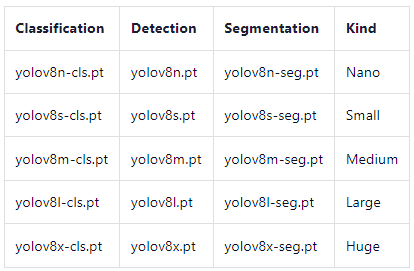

In [ ]:
# download YOLO .pt file
os.chdir("/content/YOLO_models")
model_file_name="yolov8m.pt"
model = YOLO(model_file_name)

## demo


image 1/1 /content/jimny.jpg: 480x640 1 truck, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 572.9ms postprocess per image at shape (1, 3, 480, 640)


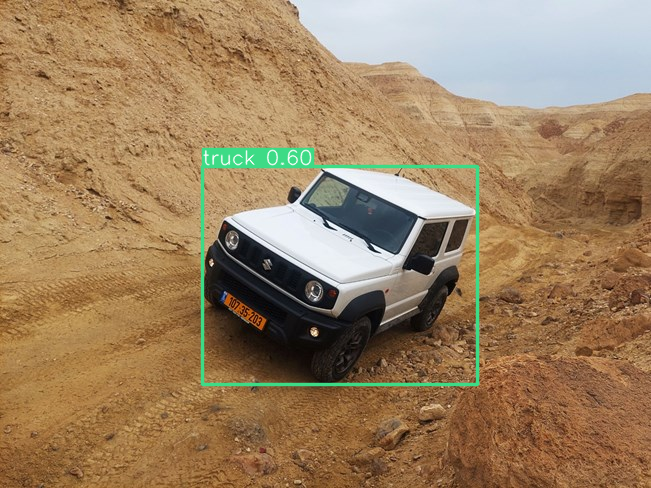

In [ ]:
# function that takes 2 images and apply yolovv8 prediction from demo
def yolov8_prediction_images(image_a_path):   # (,image_a_path)
  # 1
  results = model(image_a_path)
  for r in results:
      im_array = r.plot()  # plot a BGR numpy array of predictions
      im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
      img = cv2.cvtColor(im_array[..., ::-1], cv2.COLOR_BGR2RGB) # Open-CV reads images as BGR, we convert it to RGB
      cv2_imshow(img)

yolov8_prediction_images(image_a_path) # ,, image_b_path

# 4) Prepare Synthetic DS for GT

## download COCO validation subset (only 1GB)

In [ ]:
!mkdir /content/coco_val2017

mkdir: cannot create directory ‘/content/coco_val2017’: File exists


In [ ]:
file_exists = os.path.isfile("/content/coco_val2017/val2017.zip")
if file_exists == False:
  print("Starting to Download...", "\n")
  !wget http://images.cocodataset.org/zips/val2017.zip -P /content/coco_val2017/
else:
  print("File already exists")

File already exists


## open the zip file and extract 1000 images

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/coco_val2017/val2017.zip', 'r') as zip_ref:
    # List all files in the zip file
    # for filename in zip_ref.namelist():
    zip_ref.namelist()

# create a list with only 1000 images
images_to_extract_list=zip_ref.namelist()[1:1001]
# (the first cell is name of folder thats why we dont include it)

In [ ]:
with zipfile.ZipFile('/content/coco_val2017/val2017.zip', 'r') as zip_ref:
    # iterate over the files list to extract
    for filename in images_to_extract_list:
          zip_ref.extract(filename, '/content/coco_val2017/')
print("\n Extraction finished")


 Extraction finished


In [ ]:
!ls /content/coco_val2017/val2017 | wc -l # count to verify that there are 1000 images extracted

1000


now we have 1000 images to work with in folder: "/content/coco_val2017/val2017". For each image we want to make a transformed homography and save it

## import image libraries

In [ ]:
# general
import matplotlib.pyplot as plt
import numpy as np
import random
# matplotlib
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
# skimage
from skimage.io import imread, imshow
from skimage import transform
import skimage.io
# PIL
from PIL import Image

In [ ]:
# # the homography function will be image after imread!
# image = imread('/content/jimny.jpg')  #read image as a variable
# plt.imshow(image)
# plt.title('Original Image')
# plt.show()

## define the homography function

In [ ]:
# define function
# input: image (after imread!) and percent
# output: tranformed image as matrix

def transform_image(image, percent):
  # take 4 point in center of image
  hight, width  = image.shape[0:2]
  third_x=int(width/3)    # x is width
  third_y=int(hight/3)   # y is hieght
  # we create a rectangle in the middle of the image.
  corner1=[third_x,third_y]
  corner2=[2*third_x,third_y]
  corner3=[third_x,2*third_y]
  corner4=[2*third_x,2*third_y]

  # define the percentage from hieght and width to make the new corners
  percent_hight=int(percent*hight)
  percent_width=int(percent*width)
  #add random number to original corners
  def add(x, y):
      return x + y
  corner1_new=list(map(add,corner1,[random.randint(-percent_width,percent_width) ,random.randint(-percent_hight,percent_hight)]))
  corner2_new=list(map(add,corner2,[random.randint(-percent_width,percent_width) ,random.randint(-percent_hight,percent_hight)]))
  corner3_new=list(map(add,corner3,[random.randint(-percent_width,percent_width) ,random.randint(-percent_hight,percent_hight)]))
  corner4_new=list(map(add,corner4,[random.randint(-percent_width,percent_width) ,random.randint(-percent_hight,percent_hight)]))

  # define 4 corners in the source image and 4 points to define the homograpy change
  # source coordinates
  src = np.array([corner1, corner2, corner3, corner4]).reshape((4, 2))
  # #destination coordinates
  dst = np.array([corner1_new, corner2_new, corner3_new, corner4_new]).reshape((4, 2))
  #using skimage’s transform module where ‘projective’ is our desired parameter
  tform = transform.estimate_transform('projective', src, dst)
  tf_img = transform.warp(image, tform.inverse)

  return tf_img

In [ ]:
# #call the function
# transformed_image=transform_image(image, 0.03)
# imshow(transformed_image)
# plt.title('Transformed Image')
# plt.show()

## Creat new transformed images - without ROI

In [ ]:
# create a file for the transformed images
!mkdir /content/coco_val2017/homography

mkdir: cannot create directory ‘/content/coco_val2017/homography’: File exists


In [ ]:
# list original image names
image_to_transform = os.listdir("/content/coco_val2017/val2017")

homography for full scene

In [ ]:
# os.chdir("/content/coco_val2017/val2017") # origial img folder
# percent=0.03
# i=1
# suffix = "_homography"

# bar = progressbar.ProgressBar(maxval=len(image_to_transform)).start()

# for filename in image_to_transform:
#   # 1) imread file
#   os.chdir("/content/coco_val2017/val2017") # work in origial img folder
#   image=imread(filename)
#   # 2) transform
#   image_transformed = transform_image(image, percent)
#   # 3) save with new file in homography folder
#   new_filename = filename.split(".")[0] + suffix + ".jpg"
#   os.chdir("/content/coco_val2017/homography") # work in homography img folder
#   # cv2.imwrite(new_filename, image_transformed)
#   pyplot.imsave(new_filename, image_transformed)
#   bar.update(i)
#   i=i+1

# bar.finish()

In [ ]:
# list the new transformed images
# homography_images_list = os.listdir("/content/coco_val2017/homography")
# print("number of transformed images:", len(homography_images_list))

In [ ]:
# we have 2 images lists
# image_to_transform -      originals
# homography_images_list -  transformed

In [ ]:
os.chdir("/content") # go back to the main working directory

In [ ]:
# # randomly print original image and homograpy
# # index
# random_index = random.randint(0, len(image_to_transform)-1)
# # random_index  is the index of image to show
# print("The random index is:", random_index)

# filename_original=image_to_transform[random_index]
# filename_homography= filename_original.split(".")[0] + suffix + ".jpg"

# fig, axes = plt.subplots(1, 2)

# os.chdir("/content/coco_val2017/val2017")
# axes[0].imshow(imread(filename_original))
# axes[0].set_title('Original')

# os.chdir("/content/coco_val2017/homography")
# # # imshow(homography_images_list[random_index])
# axes[1].imshow(imread(filename_homography))
# axes[1].set_title('Homography')

# plt.show()

we have finished creating the homograpy data set

# 5) Create new tranformed images dataset  - **with ROI**

1.   Take 1,000 images(image B) from COCO (first 1000)
2.   Detect (and remember) all objects with YOLO in the image B with probability>0.5.
3. Choose one object (the first obj in the list) - remember class and bbox and prob
4. Create a list of images - image A
5. Apply Homography to all A and create the “Homography dataset” of A’.



## 1) take 1000 images

In [ ]:
# → → → → already done ← ← ← ←
# image_to_transform -      originals
# /content/coco_val2017/val2017

## 2) detect, choose, create a list of A, apply homography to A to create A'


image 1/1 /content/jimny.jpg: 480x640 1 truck, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


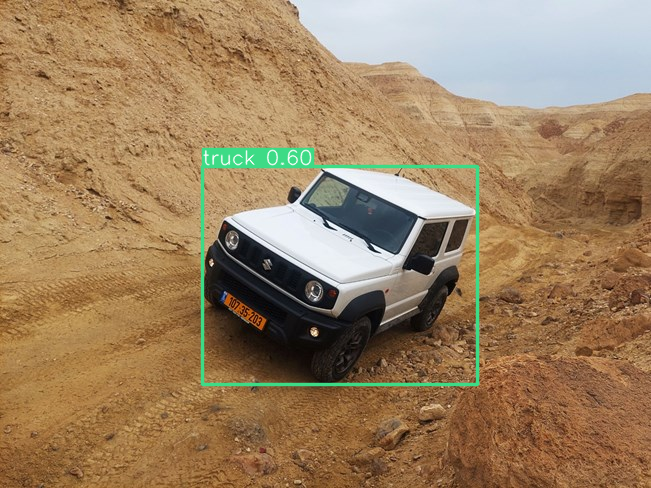

In [ ]:
image_path="/content/jimny.jpg"
# image_path="/content/coco_val2017/val2017/000000429718.jpg"
results = model(image_path)          #single image input only has result with index 0
result=results[0]
im_array = result.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
img = cv2.cvtColor(im_array[..., ::-1], cv2.COLOR_BGR2RGB) # Open-CV reads images as BGR, we convert it to RGB
cv2_imshow(img)

In [ ]:
# output properties of results
j=0
print("Total objects detected in image:", len(result.boxes))  #number of detected objects
print()
print("----------------------------------")

# iterate for all objects
for box in result.boxes:
  print("object index:   ", j)
  class_id = result.names[box.cls[0].item()]
  print("Object type :   ", class_id)
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  print("Coordinates :   ", cords)
  conf = round(box.conf[0].item(), 3)
  print("Probability :   ", conf)
  print("----------------------------------")
  j+=1

Total objects detected in image: 1

----------------------------------
object index:    0
Object type :    truck
Coordinates :    [202, 166, 477, 385]
Probability :    0.597
----------------------------------


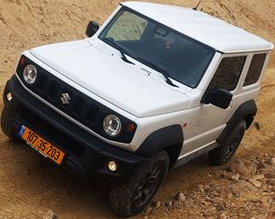

In [ ]:
prob_lower_limit=0.5      # probability lower limit

def choose_obj_from_result_and_crop(result, prob_lower_limit, image_path):
  j=0
  for box in result.boxes:
    conf = round(box.conf[0].item(), 3)
    if conf > prob_lower_limit:
      # print("Probability :   ", conf)
      # print("object index:   ", j)
      class_id = result.names[box.cls[0].item()] #0 is for one image input
      # print("Object type :   ", class_id)
      cords = box.xyxy[0].tolist()
      cords = [round(x) for x in cords]
      # print("Coordinates :   ", cords)
      # print()
      obj_selected = cords, class_id, conf
      j+=1
      # crop
      x1, y1, x2, y2 = obj_selected[0]
      image_to_crop = cv2.imread(image_path)
      cropped_image = image_to_crop[y1:y2, x1:x2]
      # cv2_imshow(cropped_img)
      break     # exit the "for" loop after the first entry of the "if"
  return cropped_image

cropped_image = choose_obj_from_result_and_crop(result, prob_lower_limit, image_path)
cv2_imshow(cropped_image)

## create dataset of cropped images A

In [ ]:
!mkdir /content/coco_val2017/val2017_cropped

In [ ]:
os.chdir("/content/coco_val2017/val2017") # origial img folder

prob_lower_limit=0.5
suffix = "_cropped"
bar = progressbar.ProgressBar(maxval=len(image_to_transform)).start()
i=1

for filename in image_to_transform:
  os.chdir("/content/coco_val2017/val2017") # work in origial img folder
  # detect
  # imshow(filename)
  # plt.show()
  results = model(filename, verbose=False)         #single image input only has result with index 0
  result = results[0]
  j=0
  for box in result.boxes:          # box is a detected object
    conf = round(box.conf[0].item(), 3)   # round the prob to 3 digits after decimal point
    if conf > prob_lower_limit:
      # print("Probability :   ", conf)
      # print("object index:   ", j)
      class_id = result.names[box.cls[0].item()] #0 is for one image input
      # print("Object type :   ", class_id)
      cords = box.xyxy[0].tolist()
      cords = [round(x) for x in cords]
      # print("Coordinates :   ", cords)
      # print()
      obj_selected = cords, class_id, conf
      j+=1
      x1, y1, x2, y2 = obj_selected[0]
      break
  image_to_crop = cv2.imread(filename)
  cropped_image = image_to_crop[y1:y2, x1:x2]

  # imshow(cropped_image)
  # plt.show()
  # print("finish crop")

  # save
  new_filename = filename.split(".")[0] + suffix + ".jpg"
  os.chdir("/content/coco_val2017/val2017_cropped") # work in homography img folder
    #check if image is empty before saving
  if cropped_image.size != 0:
    pyplot.imsave(new_filename, cropped_image)
    # open the image again to convert to RGB
    img = cv2.imread(new_filename, cv2.IMREAD_UNCHANGED)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(new_filename, img_rgb)

  #######
  else:
    pyplot.imsave(new_filename, image_to_crop)  # if cropped image size is 0 save the original
    # open the image again to convert to RGB
    img = cv2.imread(new_filename, cv2.IMREAD_UNCHANGED)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(new_filename, img_rgb)
##############

  # imshow(new_filename)
  # plt.show()

  # print("finish saving with correct color")
  # update iteration number
  bar.update(i)
  i=i+1

bar.finish()
print("\n Finished Cropping and saving images to:", getcwd())

100% (1000 of 1000) |####################| Elapsed Time: 0:00:34 Time:  0:00:34



 Finished Cropping and saving images to: /content/coco_val2017/val2017_cropped


## appply homography to cropped image A to create A'

In [ ]:
# list cropped image names
cropped_images_to_transform = os.listdir("/content/coco_val2017/val2017_cropped")

In [ ]:
len(cropped_images_to_transform)

1000

In [ ]:
!mkdir /content/coco_val2017/homography_single_object # this is the file to save images of selected obj

In [ ]:
percent=0.14
i=1
suffix = "_homography_single_object"
bar = progressbar.ProgressBar(maxval=len(cropped_images_to_transform)).start()

for filename in cropped_images_to_transform:
  # 1) imread file
  os.chdir("/content/coco_val2017/val2017_cropped")
  try:
    image=imread(filename)
    # 2) transform
    image_transformed = transform_image(image, percent)
    # 3) save with new file in homography folder
    new_filename = filename.split(".")[0] + suffix + ".jpg"
    os.chdir("/content/coco_val2017/homography_single_object") # work in homography img folder
    # cv2.imwrite(new_filename, image_transformed)
    pyplot.imsave(new_filename, image_transformed)
  except:
    continue
  bar.update(i)
  i=i+1

bar.finish()
print("\nFinished transforming images A to create A' in folder:\n", getcwd())

100% (1000 of 1000) |####################| Elapsed Time: 0:00:11 Time:  0:00:11



Finished transforming images A to create A' in folder:
 /content/coco_val2017/homography_single_object


In [ ]:
homography_single_object_list= os.listdir("/content/coco_val2017/homography_single_object")
len(homography_single_object_list)

1000

## show some random images to make sure everything worked

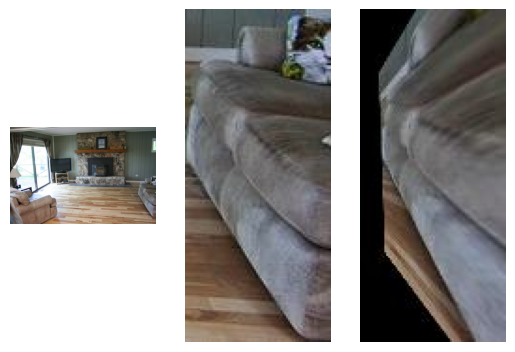

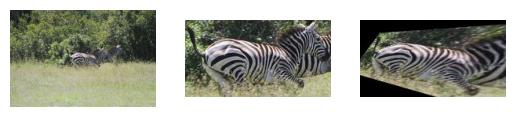

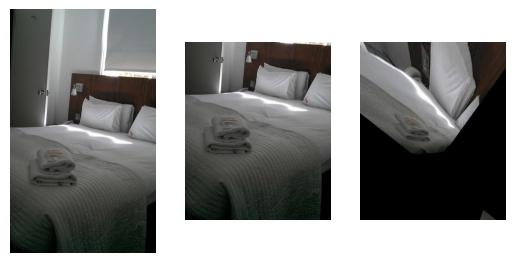

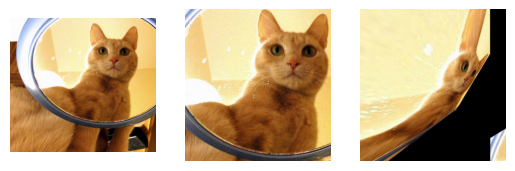

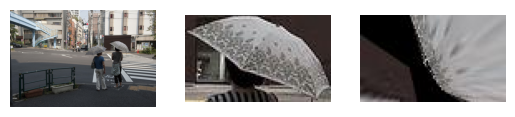

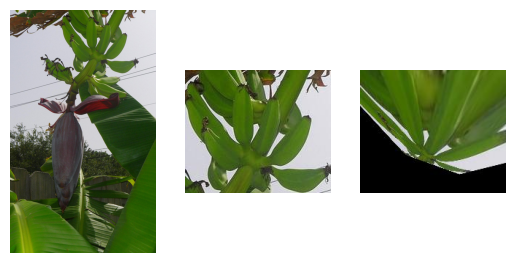

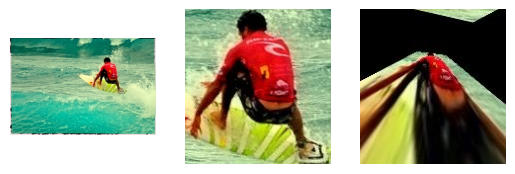

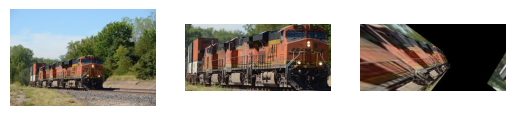

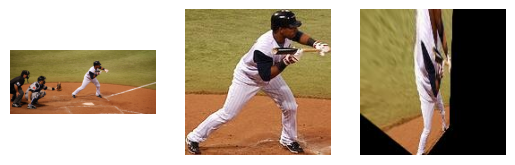

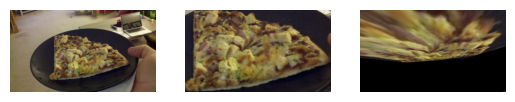

In [ ]:
suffix1 = "_cropped"
suffix2 = "_cropped_homography_single_object"

random_numbers = [random.randint(1, 1000) for _ in range(10)]
for number in random_numbers:
  filename = image_to_transform[number]
  #original
  os.chdir("/content/coco_val2017/val2017")
  image1 = plt.imread(  image_to_transform[number]  )
  #cropped
  new_filename = filename.split(".")[0] + suffix1 + ".jpg"
  os.chdir("/content/coco_val2017/val2017_cropped")
  image2 = plt.imread(  new_filename  )
  #homography
  new_filename = filename.split(".")[0] + suffix2 + ".jpg"
  os.chdir("/content/coco_val2017/homography_single_object")
  image3 = plt.imread( new_filename  )
  # Display the images in a row
  fig, axes = plt.subplots(1, 3)
  axes[0].imshow(image1)
  axes[1].imshow(image2)
  axes[2].imshow(image3)
  for ax in axes:
      ax.set_axis_off()
  plt.show()


In [ ]:
random_numbers

[121, 153, 689, 267, 725, 156, 212, 792, 961, 312]

# 4) Evaluation of work

now we will use the datasets we created for evaluating our 2 models integration

## create a list with roi for each image B - image_to_transform_list_of_roi

In [ ]:
image_to_transform_list_of_roi = []
bar = progressbar.ProgressBar(maxval=len(image_to_transform)).start()
i=0
for filename in image_to_transform:
  # predict image with yolo
  os.chdir("/content/coco_val2017/val2017")
  results = model(filename)
  result=results[0]
  # iterate on results
  j=0
  # print("number of objects detected in :", filename, "is:", len(result.boxes))
  # iterate for all objects
  list_of_cords_in_image=[]
  for box in result.boxes:
    # print("object index:   ", j)
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    # print("Coordinates :   ", cords)
    # print("----------------------------------")
    list_of_cords_in_image.append(cords)
    j+=1
  bar.update(i)
  i+=1
  image_to_transform_list_of_roi.append([filename, list_of_cords_in_image])

 99% (996 of 1000) |#################### | Elapsed Time: 0:00:25 ETA:   0:00:00

In [ ]:
len(image_to_transform_list_of_roi)

1000

## create df to controll all images and roi's

In [ ]:
# list of homographies - A':      homography_single_object_list
# list of oroginal images - B:    image_to_transform
# list of ROI in B:               image_to_transform_list_of_roi  [ image filname, [roi1, roi2, ..., roin]  ]

In [ ]:
# print(image_to_transform[:1])
print(image_to_transform_list_of_roi[3]) # list of image name and its ROI's

['000000288584.jpg', [[202, 0, 410, 420], [403, 148, 493, 389], [128, 257, 213, 426], [119, 93, 190, 334], [76, 341, 116, 427], [19, 296, 107, 426], [473, 73, 520, 246], [525, 79, 608, 181], [620, 118, 640, 204], [542, 120, 614, 243], [180, 297, 221, 377], [6, 1, 46, 55], [525, 43, 612, 180], [7, 0, 65, 55]]]


In [ ]:
# first index: file name
# second index: roi list
# third index: cords of object

In [ ]:
j=0
no_object_in_image_list=[]
for i in sorted(image_to_transform_list_of_roi):
  no_object_in_image= len(image_to_transform_list_of_roi[j][1])
  no_object_in_image_list.append(no_object_in_image)
  # print(no_object_in_image)
  j+=1

In [ ]:
# create df of image names and roi's
column_names= ["image_a_tag","image_b", "image_b_roi", "no_object_in_image"]
df=pd.DataFrame(columns=column_names)

In [ ]:
df["image_b"]=      sorted(image_to_transform)
df["image_b_roi"]=  sorted(image_to_transform_list_of_roi)
df["image_a_tag"]=  sorted(homography_single_object_list)
df["no_object_in_image"] = no_object_in_image_list

In [ ]:
df

image_a_tag           image_b  \
0    000000000285_cropped_homography_single_object.jpg  000000000285.jpg   
1    000000000724_cropped_homography_single_object.jpg  000000000724.jpg   
2    000000000885_cropped_homography_single_object.jpg  000000000885.jpg   
3    000000001000_cropped_homography_single_object.jpg  000000001000.jpg   
4    000000001425_cropped_homography_single_object.jpg  000000001425.jpg   
..                                                 ...               ...   
995  000000577976_cropped_homography_single_object.jpg  000000577976.jpg   
996  000000578922_cropped_homography_single_object.jpg  000000578922.jpg   
997  000000579158_cropped_homography_single_object.jpg  000000579158.jpg   
998  000000579900_cropped_homography_single_object.jpg  000000579900.jpg   
999  000000581357_cropped_homography_single_object.jpg  000000581357.jpg   

                                           image_b_roi  no_object_in_image  
0              [000000000285.jpg, [[0, 74, 584, 638]]]                  26  
1    [000000000724.jpg, [[120, 72, 255, 226], [203,...                   3  
2    [000000000885.jpg, [[278, 187, 417, 398], [595...                  21  
3    [000000001000.jpg, [[503, 190, 640, 480], [117...                  14  
4    [000000001425.jpg, [[31, 177, 440, 400], [494,...                  20  
..                                                 ...                 ...  
995  [000000577976.jpg, [[509, 251, 640, 336], [394...                  19  
996  [000000578922.jpg, [[316, 503, 427, 639], [180...                   7  
997  [000000579158.jpg, [[1, 2, 601, 420], [0, 324,...                   1  
998  [000000579900.jpg, [[0, 34, 375, 449], [208, 1...                   2  
999  [000000581357.jpg, [[257, 93, 482, 343], [228,...                  11  

[1000 rows x 4 columns]

we now have a df with image A' and B names and there roi's and amount if roi's for each image

## define "plot_matches"

In [ ]:
#plot matches
import matplotlib
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
# import numpy as np
# import torch

def plot_matches(kpts0, kpts1, roi_b , color=None, lw=1.5, ps=4, a=1.0, labels=None, axes=None):
    """Plot matches for a pair of existing images.
    Args:
        kpts0, kpts1: corresponding keypoints of size (N, 2).
        color: color of each match, string or RGB tuple. Random if not given.
        lw: width of the lines.
        ps: size of the end points (no endpoint if ps=0)
        indices: indices of the images to draw the matches on.
        a: alpha opacity of the match lines.
    """

    shiftX_B, shiftY_B = roi_b[0], roi_b[1]
    #create a gcf figure
    fig = plt.gcf()
    if axes is None:
        ax = fig.axes
        ax0, ax1 = ax[0], ax[1]
    else:
        ax0, ax1 = axes
    if isinstance(kpts0, torch.Tensor):#check if kpts0 is torch.tensor
        kpts0 = kpts0.cpu().numpy()
    if isinstance(kpts1, torch.Tensor):
        kpts1 = kpts1.cpu().numpy()
    assert len(kpts0) == len(kpts1)#check if kpts0 and kpts1 has similliar length
    if color is None:#matching lines color definition
        color = matplotlib.cm.hsv(np.random.rand(len(kpts0))).tolist()
    elif len(color) > 0 and not isinstance(color[0], (tuple, list)):
        color = [color] * len(kpts0)

    if lw > 0:#lw(lines width) defined as 1.5
        for i in range(len(kpts0)):
            line = matplotlib.patches.ConnectionPatch(
                xyA=(kpts0[i, 0], kpts0[i, 1]),#coordinates of point xy in image A + shift_A
                xyB=(kpts1[i, 0]+shiftX_B, kpts1[i, 1]+shiftY_B),#coordinates of point xy in image B + shift_B
                coordsA=ax0.transData,
                coordsB=ax1.transData,
                axesA=ax0,
                axesB=ax1,
                zorder=1,
                color=color[i],
                linewidth=lw,
                clip_on=True,
                alpha=a,
                label=None if labels is None else labels[i],
                picker=5.0,
            )
            line.set_annotation_clip(True)
            fig.add_artist(line)

    # freeze the axes to prevent the transform to change
    ax0.autoscale(enable=False)
    ax1.autoscale(enable=False)

    if ps > 0:
        ax0.scatter(kpts0[:, 0], kpts0[:, 1], c=color, s=ps)
        ax1.scatter(kpts1[:, 0], kpts1[:, 1], c=color, s=ps)

## apply lightglue for each obj in B with A'

In [ ]:
# number of keypoints matched m_kpts1 (=m_kpts0 because they match)

In [ ]:
#function gets image B+ROIs and image A' and returns the matches
def lightglue(image_a, image_b,  roi_b): # roi_a,
  os.chdir("/content/coco_val2017/homography_single_object")
  image0 = load_image(image_a).cuda()
  os.chdir("/content/coco_val2017/val2017")
  image1 = load_image(image_b).cuda()
  # x1_a, x2_a , y1_a,y2_a =roi_a
  x1_b, y1_b , x2_b ,y2_b = int(roi_b[0]), int(roi_b[1]), int(roi_b[2]), int(roi_b[3])

  # viz2d.plot_images([image0, image1[:, y1_b:y2_b, x1_b:x2_b]])

  feats0 = extractor.extract(image0.to(device))
  feats1 = extractor.extract(image1[:, y1_b:y2_b, x1_b:x2_b].to(device))
  matches01 = matcher({"image0": feats0, "image1": feats1})
  feats0, feats1, matches01 = [ rbd(x) for x in [feats0, feats1, matches01] ]  # remove batch dimension

  kpts0, kpts1, matches = feats0["keypoints"], feats1["keypoints"], matches01["matches"]
  m_kpts0, m_kpts1 = kpts0[matches[..., 0]], kpts1[matches[..., 1]]

  # axes = viz2d.plot_images([image0, image1])
  # plot_matches(m_kpts0, m_kpts1,roi_b , color="lime", lw=0.2) #plot the matches with shift to the right place
  # viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
  # viz2d.add_text(0, f'Stop after {matches01["stop"]} layers')

  # kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
  # viz2d.plot_images([image0, image1])
  # viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=6)
  return len(m_kpts0), len(m_kpts1), len(kpts0), len(kpts1)

In [ ]:
start_time=time.time()
m_kpts0_list=[]
results_lightglue_list=[]
score_list=[]
max_index= 999        # 0 to 999
# bar = progressbar.ProgressBar(maxval=max_index+1).start()
u=0
# iterate each row in df
for index, row in df.iterrows():
  if 0 <= index <= max_index : # just for saving time
    image_a= row['image_a_tag']
    image_b= row['image_b']
    b_roi = row['image_b_roi']
    n = row['no_object_in_image']
    # for each roi iterate
    m_kpts0_list_per_image=[]
    results_lightglue_per_image=[]
    score_per_image_list=[]
    for cords in b_roi[1]:
      # print(i)
      # m_kpts0 =  lightglue(image_a, image_b, i)
      # m_kpts0_list_per_image.append(len(m_kpts0))
      results_lightglue = lightglue(image_a, image_b, cords)
      results_lightglue_per_image.append(results_lightglue)
      if results_lightglue[3] == 0:
        score_per_object= 0             # score= matches/keypoints of image B
      else:
        score_per_object= results_lightglue[0]/results_lightglue[3]       #  len(m_kpts0)/len(kpts1)
      score_per_image_list.append(score_per_object)
    # m_kpts0_list.append(m_kpts0_list_per_image)
    results_lightglue_list.append(results_lightglue_per_image)
    score_list.append(score_per_image_list)
  # bar.update(1)
  print(u)
  u+=1
# bar.finish()
print("finished")
print("duration in minuites=", (time.time()-start_time)/60 )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

we know that the first object is the original object, so if the first object gets the maximum matches/keypoints we consider as truth

In [ ]:
# count true and false predictions
score_list_length=len(score_list)
print("score_list_length:", score_list_length)
list_of_true_false=[]
k=0
try_num=0
except_num=0
for image_scores in score_list:
  # print(k)
  k+=1
  try:
    try_num+=1
    if max(image_scores) == image_scores[0]:
      list_of_true_false.append(1)
    else:
      list_of_true_false.append(0)
  except:
    except_num+=1
    list_of_true_false.append(0)
print("try", try_num)
print("except", except_num)

score_list_length: 1000
try 1000
except 10


In [ ]:
counts=Counter(list_of_true_false)
print(counts)

Counter({1: 840, 0: 160})


In [ ]:
true_1=counts[1]
false_0=counts[0]

In [ ]:
x=(true_1/(true_1+false_0))*100
print(x,"%")
print("percent homography", percent)

84.0 %
percent homography 0.14


In [ ]:
score_list[0:3]

[[0.16313309776207302],
 [0.1171875, 0.008714596949891068, 0.00341796875],
 [0.212890625,
  0.017241379310344827,
  0.0107421875,
  0.07275390625,
  0.006436041834271922,
  0.005065856129685917,
  0.0,
  0.00472972972972973,
  0.002805049088359046,
  0.0,
  0.0,
  0.0011494252873563218,
  0.0]]

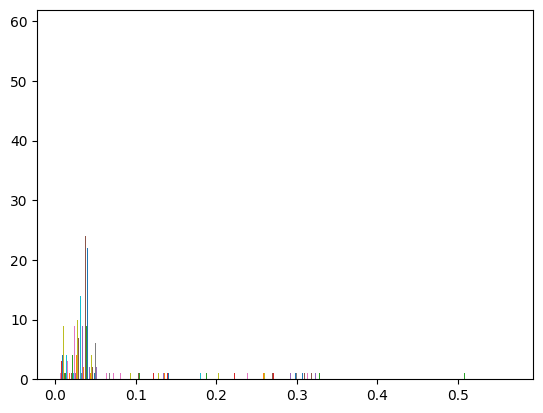

In [ ]:
plt.hist(score_list)
plt.show()

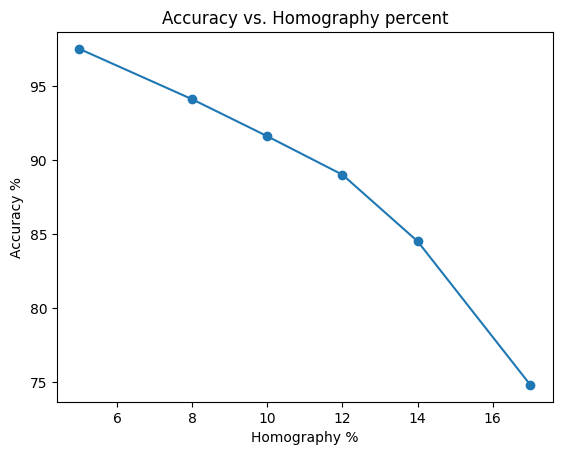

In [ ]:
y=[97.5,  94.1,   91.6,      89,  84.5,  74.8]
x=[5,     8,      10,        12,  14,     17]
plt.plot(x, y, marker='o')
plt.xlabel("Homography %")
plt.ylabel("Accuracy %")
plt.title("Accuracy vs. Homography percent")

plt.show()